In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from tempfile import TemporaryFile
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

## As the document suggestion, there is no missing data in this dataset, so we will skip process on them.

In [2]:
##load data and remove the space in the column names
os.chdir(r'C:\Users\50670\ese-417-final-project')
red = pd.read_csv('data/raw/winequality-red.csv', sep=';')
red.columns = [x.strip().replace(' ','_') for x in red.columns]
red




,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


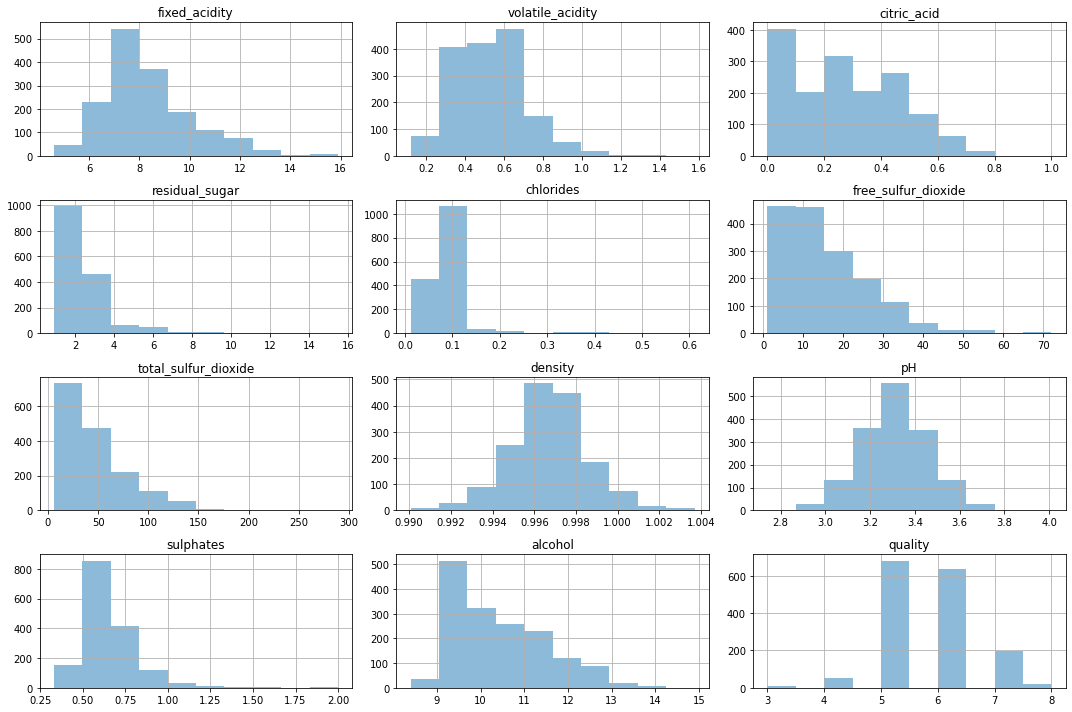

In [3]:
## basic visualization
#Summarative functions
red.dtypes
red.describe()
red.info()

#Plotting histogram of each variable
red.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

7
2943


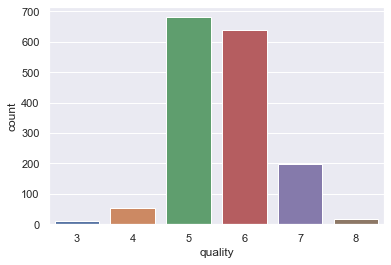

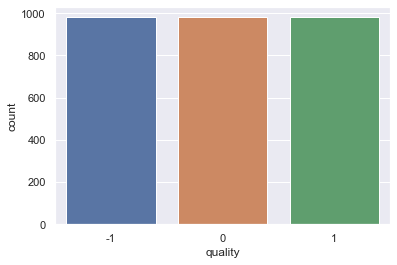

[0 0 0 ... 0 0 0]


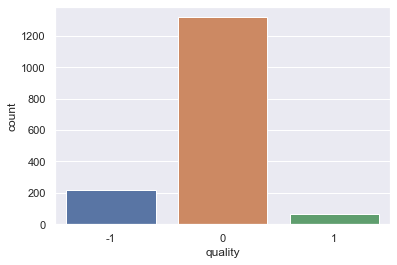

In [4]:
import os
os.chdir(r'C:\Users\50670\ese-417-final-project')
from utils.utils import load_data
X_train, X_test, y_train, y_test = load_data(4)    
print(X_train.shape[1])
print(len(y_train))

quality = red['quality']
sns.countplot(x="quality",data=red)
plt.show()

df=pd.DataFrame(y_train,columns=['quality'])
sns.countplot(x="quality",data=df)
plt.show()



quality2 = np.array(quality)
for i in range(len(quality2)):
    if quality2[i] >= 7:
        quality2[i] = -1
    elif quality2[i] >= 5:
        quality2[i] = 0
    else: quality2[i] = 1
print(quality2)
df=pd.DataFrame(quality2,columns=['quality'])
sns.countplot(x="quality",data=df)
plt.show()






    
#sns.countplot(x=)

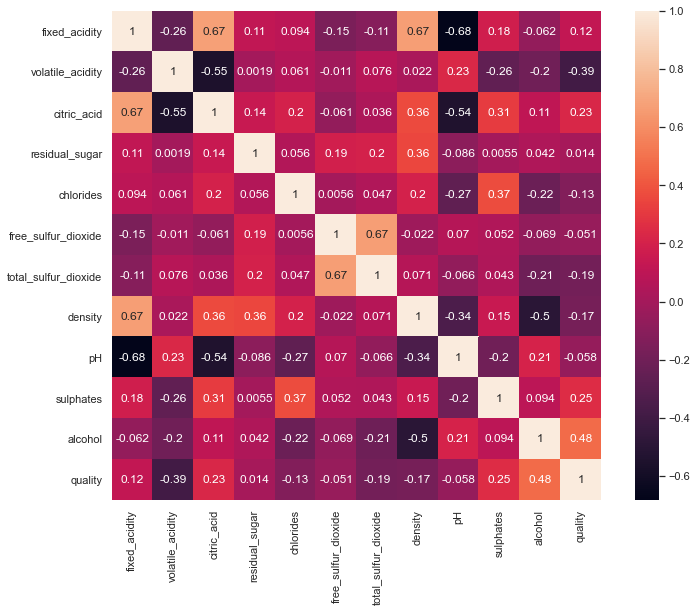

In [5]:
## correlation

corrmat = red.corr()
 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True,annot=True)
plt.show()


In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

X_f = red.loc[:, 'fixed_acidity':'alcohol']
y_f = red['quality']

#apply SelectKBest class to extract top best features
bestFeatures = SelectKBest(f_classif, k=11)
bestFeaturesFit = bestFeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(bestFeaturesFit.scores_)  #Store predictor scores in a column 
dfcolumns = pd.DataFrame(X_f.columns)  #Store predictor variable names in a column

# #concatenate scores with predictor names
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(11,'Score'))       #print top (by score) 10 features

#Drop the bottom two features (smallest score)
#selectedDf = heartData.drop('fasting_blood_sugar', 1)
#selectedDf = selectedDf.drop('rest_ecg', 1)

# selectedDf.dtypes
#selX = selectedDf.loc[:, 'fixed_acidity':'alcohol']
#selY = selectedDf['quality']

               Predictor       Score
10               alcohol  115.854797
1       volatile_acidity   60.913993
6   total_sulfur_dioxide   25.478510
9              sulphates   22.273376
2            citric_acid   19.690664
7                density   13.396357
0          fixed_acidity    6.283081
4              chlorides    6.035639
5    free_sulfur_dioxide    4.754233
8                     pH    4.341764
3         residual_sugar    1.053374


In [52]:
##delete duplicaed data
red_noDup = red.drop_duplicates()
red_noDup

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [53]:
##
red_noDup.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [54]:
"""
print (red_noDup[red_noDup['density']>1])
"""

"\nprint (red_noDup[red_noDup['density']>1])\n"

In [55]:
##quality in a scope of (3-8)
red_noDup['quality'].value_counts()


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [56]:
if ('qMark' not in red_noDup): 
    red_noDup['qMark'] = red_noDup['quality'].map({3 : 'low', 4 :'low', 5: 'median',
                                      6: 'median', 7: 'high', 8: 'high'})

C:\Users\qingyuan.1016\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
red_noDup

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,qMark
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,median
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,median
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,median
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,median
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,median
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,median
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,median
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,median
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,median


In [58]:
red_noDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  qMark                 1359 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 148.6+ KB


In [59]:
red_noDup['qMark'].value_counts()

median    1112
high       184
low         63
Name: qMark, dtype: int64

In [60]:
##split dataset into X and y
X = red_noDup.iloc[:,:11].values
#y = red_noDup.iloc[:,12].values
y = red_noDup.iloc[:,11].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [61]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [62]:
##z-score normalized
X = stats.zscore(X)

In [63]:
X

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [64]:
##save X and y as outfiles 
import os
os.chdir(r'../preprocessed')
if(os.path.exists('X_array.npy')==False):
    np.save('X_array.npy', X)
if(os.path.exists('y_array.npy')==False):
    np.save('y_array.npy', y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
import os
os.chdir(r'../preprocessed')
if(os.path.exists('X_train.npy')==False):
    np.save('X_train.npy', X_train)
if(os.path.exists('y_train.npy')==False):
    np.save('y_train.npy', y_train)
if(os.path.exists('X_test.npy')==False):
    np.save('X_test.npy', X_test)
if(os.path.exists('y_test.npy')==False):
    np.save('y_test.npy', y_test)

NameError: name 'X' is not defined

In [30]:
import os
os.chdir(r'C:\Users\50670\ese-417-final-project')
from utils.utils import load_data
X_train, X_test, y_train, y_test = load_data(4)    
print(X_train.shape[1])
print(len(y_train))

7
2943


In [36]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#attempt 1
red_SVM = SVC()
C_choose = np.linspace(0.5,5,20)
gamma_choose = np.linspace(0.2,5,20)
param_grid_svm = {
    'kernel': ['rbf'], 
    'C': C_choose,
    'gamma': gamma_choose, 
    'decision_function_shape': ['ovo','ovr']
}

CV_svm = GridSearchCV(estimator=red_SVM, param_grid=param_grid_svm, cv= 10)
CV_svm.fit(X_train, y_train)

print(CV_svm.best_params_)

#print(CV_svm.best_params_['C'])



{'C': 4.763157894736842, 'decision_function_shape': 'ovo', 'gamma': 3.9894736842105267, 'kernel': 'rbf'}


In [37]:
import joblib
joblib.dump(CV_svm,'models/svm1_gs.pkl')

['models/svm1_gs.pkl']

In [38]:
C_best = svm.SVC(kernel = CV_svm.best_params_['kernel'], C = CV_svm.best_params_['C'], gamma = CV_svm.best_params_['gamma'], decision_function_shape = CV_svm.best_params_['decision_function_shape']) 

for i in range(11):
    load_data(i)
    
C_best.fit(X_train,y_train)

y_pred = C_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_pred)
clas = classification_report(y_pred, y_test)
print(clas)

Accuracy: 0.855
[ 0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0 -1  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 -1
  0  1  0  0  0  0  0 -1  0  0  0  

In [39]:
#attempt 2
red_SVM = SVC()
C_choose = np.linspace(0.5,5,20)
gamma_choose = np.linspace(0.2,5,20)
param_grid_svm = {
    'kernel': ['poly'], 
    'C': C_choose,
    'degree': [2,3,4,5],
    'decision_function_shape': ['ovo','ovr']
}

CV_svm = GridSearchCV(estimator=red_SVM, param_grid=param_grid_svm, cv= 10)
CV_svm.fit(X_train, y_train)

print(CV_svm.best_params_)

joblib.dump(CV_svm,'models/svm2_gs.pkl')


{'C': 5.0, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'poly'}


['models/svm2_gs.pkl']

In [40]:
C_best = svm.SVC(kernel = CV_svm.best_params_['kernel'], C = CV_svm.best_params_['C'], degree = CV_svm.best_params_['degree'], decision_function_shape = CV_svm.best_params_['decision_function_shape']) 
C_best.fit(X_train,y_train)
y_pred = C_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_pred)
clas = classification_report(y_pred, y_test)
print(clas)

Accuracy: 0.76
[ 0  0 -1  1  0  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0  0  0 -1  0
  0  0  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0
  0  0  0  0 -1  0  0  0  0  0  1  1  0  0  1  0  0  1  1  1  0  0  0  1
  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  1  0  0  0 -1  0  0  0  0  0  1  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  0  1  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1 -1  1  0  0  0  0
 -1  1  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0 -1  0  0  0 -1  1  0
  0  1 -1  1  0  0  0  0  0  0  1  0  0  1  0  1  0  0 -1  1  0  1  1  0
 -1  1  0  0  1  0  1  0  0  1  0  0  1  0  1  1  0 -1  0  0  0  0  1 -1
  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0 -1  0  1  0 -1  0
  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0  0  0  1 -1  0  0  1  1  0
  1  0  0 -1  0  0  0  0  1  0  0  0  0 -1  1  0  0  1  0  0  0  0  1 -1
  0  0  0  1  0  0 -1 -1  0  0  0  0

In [43]:
#attempt 3
red_SVM = SVC()
C_choose = np.linspace(0.5,5,20)
gamma_choose = np.linspace(0.2,5,20)
param_grid_svm = {
    'kernel': ['linear','sigmoid'], 
    'C': C_choose,
    'decision_function_shape': ['ovo','ovr']
}

CV_svm = GridSearchCV(estimator=red_SVM, param_grid=param_grid_svm, cv= 10)
CV_svm.fit(X_train, y_train)

print(CV_svm.best_params_)

joblib.dump(CV_svm,'models/svm3_gs.pkl')



{'C': 0.9736842105263157, 'decision_function_shape': 'ovo', 'kernel': 'linear'}


['models/svm3_gs.pkl']

In [44]:
#print(CV_svm.best_params_['C'])
C_best = svm.SVC(kernel = CV_svm.best_params_['kernel'], C = CV_svm.best_params_['C'], decision_function_shape = CV_svm.best_params_['decision_function_shape']) 
C_best.fit(X_train,y_train)
y_pred = C_best.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_pred)
clas = classification_report(y_pred, y_test)
print(clas)

Accuracy: 0.665
[ 0  0 -1  1  0  0  0  0  1  0  1  0 -1  1  1  0  1  1  0  0 -1  0  0  0
  1  0  0  0  1  1  0 -1  0  0 -1  0  1  0  0  0  0 -1  0  0  1  0  0  0
  0  0  1  0  0 -1  1  0  0  0  1  1  0  0  1  1  0  1  1  0  0  0  0  1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  1  0 -1 -1  0
  0 -1  0  1  0 -1  0  1  0  0  0 -1  0 -1  0  0  0  1  1 -1  0  0  0  0
 -1  0  0  1  0  0 -1  0  0  1  0  0  1  1  0  0  0  1  0  1 -1  0  1  1
  1  0  0  0  0  0  0  0 -1  0  0  1  0  1  0  0  1  1  0  1  0  0  0  0
  0  1  1  1  0  0  0  0  1  0  0  1  0  0  0  0  0 -1  1  0  0 -1  1  0
  0  1 -1  1  1  0  0  0  0  0  1  0  0  1  0  1  0  0 -1  1  0  1  1  0
 -1  1  0  0  1  0  1  0 -1  1  0  0  1  0  1  1 -1  0  0  0  1  0  1 -1
  0  0  0  0  0  1  0  1  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  1  0  1  1  1  1  0  0  1  0  1 -1  0 -1  1  1  0
  1  0  0  0  1  0  0  1  1  0 -1  0  0 -1  1  0  0  1  0  0 -1  0  1  0
  0  0 -1  1 -1  0  0 -1  0  1  1  

In [47]:
#attempt 4
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
joblib.dump(clf,'models/Naivebayes.pkl')
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_pred)
clas = classification_report(y_pred, y_test)
print(clas)

Accuracy: 0.445
[-1  1 -1  1 -1 -1  0  1  1  0  1  0 -1  1  0 -1  1  1  0  0 -1 -1 -1 -1
  1  0  0  0  0  1  0  0  1 -1 -1 -1  1  1 -1  0  1 -1  0 -1  1 -1  0 -1
  0 -1  1  0  1 -1  1  0  0 -1  1  1 -1  0  1  1  0  1  1  1  0 -1 -1  1
  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1  0  0 -1  0 -1  1  0 -1 -1 -1 -1
  0  0  1  1  1 -1  0  1 -1 -1  0 -1  0 -1  1  0 -1  1  1 -1 -1  0 -1  0
 -1 -1  0  1  0  0 -1  0  1  1  0  0  1  1 -1 -1  0  1  0  1 -1  0  1  1
  1 -1  0  0 -1 -1 -1  0 -1  0  0  1  0  1 -1  0  1  1  0  1  1 -1  0  0
  0  1  1  1  0 -1  0  0  1  1 -1  1 -1  0  0 -1  0 -1  1  0  0 -1  1  0
  1  1 -1  1  1  0 -1 -1 -1 -1  1  0 -1  1  0  1  0  0  0  1  0  1  1 -1
 -1  1  0  0  1 -1  1  0 -1  1  0  1  1  0  1  1 -1 -1  0  0  1 -1  1 -1
  0  0 -1 -1  0  0  0  1  0  1 -1  1  0  1  1 -1  0  0 -1  0  0  0 -1  1
  1 -1  0  0 -1  0 -1  1  0  1  1  1  1  0  0  1  0  1 -1  0 -1  1  1  0
  0 -1  0  0  1 -1  0  1  1  0 -1  0  1 -1  0  0 -1  1  0  0 -1  0  1 -1
 -1  0  0  1 -1  0 -1 -1 -1  0  0 -

In [63]:
for j in range(0,len(y_train)):
    if y_train[j] <= 6:
        y_train[j] = 0
    else:
        y_train[j] = 1
for j in range(0,len(y_test)):
    if y_test[j] <= 6:
        y_test[j] = 0
    else:
        y_test[j] = 1 
        
for j in range(0,len(y_train)):
    if y_train[j] <= 4:
        y_train[j] = -1
    elif y_train[i] <= 6:
        y_train[j] = 0
    else: 
        y_train[j] = 1
         
for j in range(0,len(y_test)):
    if y_test[j] == 4:
        y_test[j] = -1
    elif y_test[j] <= 6:
        y_test[j] = 0
    else: 
        y_test[j] = 


      

    

[-1  1  1 ...  1  1 -1]
[ 1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1
  1  1 -1  1 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1
  1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1
 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1
  1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1
 -1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1 -1
 -1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1
  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1
 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1
 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1
  1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1
  1  1 -1  1 -1  1 -1  1 -1

In [48]:
import joblib
svm1_gs=joblib.load('models/svm1_gs.pkl')
svm1_gs.best_params_
C_best = svm.SVC(kernel = svm1_gs.best_params_['kernel'], C = svm1_gs.best_params_['C'], gamma = svm1_gs.best_params_['gamma'], decision_function_shape = svm1_gs.best_params_['decision_function_shape'])
C_best.fit(X_train,y_train)


SVC(C=4.763157894736842, decision_function_shape='ovo',
    gamma=3.9894736842105267)

In [53]:
# performance
#1 SVM(rbf)
from sklearn.metrics import accuracy_score
accuracy_score_svm = []
for i in range(11):
    X_train, X_test, y_train, y_test = load_data(i)
    svm1_gs=joblib.load('models/svm1_gs.pkl')
    Trial = svm.SVC(kernel = svm1_gs.best_params_['kernel'], C = svm1_gs.best_params_['C'], gamma = svm1_gs.best_params_['gamma'], decision_function_shape = svm1_gs.best_params_['decision_function_shape'])
    Trial_result = Trial.fit(X_train, y_train)
    joblib.dump(Trial_result, 'models/svm1_%d.pkl'%(i),compress=1)
    y_pred = Trial_result.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_score_svm.append(accuracy)
np.save('models/svm1_performance_score.npy', accuracy_score_svm)

    

In [54]:
print(accuracy_score_svm)

[0.8675, 0.87, 0.8675, 0.86, 0.855, 0.845, 0.83, 0.8, 0.71, 0.6225, 0.555]


In [50]:
#2 SVM(poly)
from sklearn.metrics import accuracy_score
accuracy_score_svm = []
for i in range(11):
    X_train, X_test, y_train, y_test = load_data(i)
    svm2_gs=joblib.load('models/svm2_gs.pkl')
    Trial = svm.SVC(kernel = svm2_gs.best_params_['kernel'], C = svm2_gs.best_params_['C'], degree = svm2_gs.best_params_['degree'], decision_function_shape = svm2_gs.best_params_['decision_function_shape'])
    Trial_result = Trial.fit(X_train, y_train)
    joblib.dump(Trial_result, 'models/svm2_%d.pkl'%(i),compress=1)
    y_pred = Trial_result.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_score_svm.append(accuracy)
np.save('models/svm2_performance_score.npy', accuracy_score_svm)

In [51]:
#3 SVM(linear,sigmoid)
from sklearn.metrics import accuracy_score
accuracy_score_svm = []
for i in range(11):
    X_train, X_test, y_train, y_test = load_data(i)
    svm3_gs=joblib.load('models/svm3_gs.pkl')
    Trial = svm.SVC(kernel = svm3_gs.best_params_['kernel'], C = svm3_gs.best_params_['C'],  decision_function_shape = svm3_gs.best_params_['decision_function_shape'])
    Trial_result = Trial.fit(X_train, y_train)
    joblib.dump(Trial_result, 'models/svm3_%d.pkl'%(i),compress=1)
    y_pred = Trial_result.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_score_svm.append(accuracy)
np.save('models/svm3_performance_score.npy', accuracy_score_svm)

In [52]:
#4 naivebayes
from sklearn.metrics import accuracy_score
accuracy_score_naivebayes = []
for i in range(11):
    X_train, X_test, y_train, y_test = load_data(i)
    Nb =joblib.load('models/Naivebayes.pkl')
    Nb_result = Nb.fit(X_train, y_train)
    joblib.dump(Nb_result, 'models/Nb_%d.pkl'%(i),compress=1)
    y_pred = Nb_result.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_score_naivebayes.append(accuracy)
np.save('models/Nb_performance_score.npy', accuracy_score_naivebayes)

In [55]:
print(accuracy_score_naivebayes)

[0.515, 0.525, 0.4975, 0.4825, 0.445, 0.445, 0.445, 0.445, 0.38, 0.3575, 0.705]
